**Post Test - Self-Organizing Maps**

*Self-organizing maps*(SOM), atau yang disebut juga dengan
topology-preserving maps, adalah sebuah algoritma klasterisasi (clustering)
sehingga termasuk pada algoritma unsupervised learning.

#Kode (Jangan diubah)
Fungsi *self-organizing maps*

In [ ]:
import numpy as np

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []
    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min = np.argmin(d)
            centroids[min] += lrate * (x - centroids[min])
        lrate *= b
        epoch += 1

    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min = np.argmin(d)
        labels.append(min)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'
    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')
    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

#Soal

Gunakan dataset "Mall_Customers.csv" yang telah dilampirkan

Terdapat data Mall Segentation yang berisikan data CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100). Pada data tersebut, akan dilakukan klasterisasi menjadi 3 klaster dengan:
1.  learning rate=0.1, b=0.1, dan max_epoc=6

### a) Load data

In [ ]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### b) Preprocess

In [ ]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})#diisi praktikan => rubah nilai kolom Gender, Female menjadi 0, dan Male menjadi 1
data['Gender'].unique()

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### c) Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

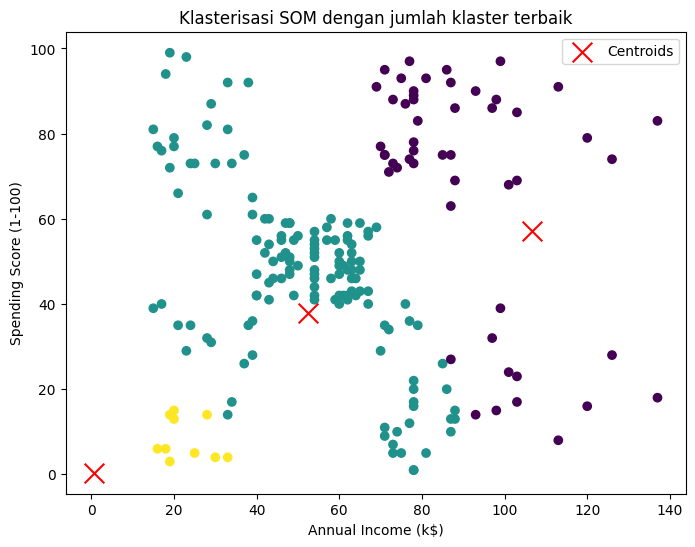

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data yang digunakan untuk klasterisasi adalah fitur Annual Income (k$)	Spending Score (1-100)
X = data[['Annual Income (k$)', 'Spending Score (1-100)'] ].values # diisi praktikan
print('Data:\n', X)

centroids, labels = som(X, lrate=0.1 , b=0.1 , max_epoch=6 , n_cluster=3) # isi sesuai dengan perintah soal di atas
print('centroid terbaru:\n',centroids)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)

Perbandingan Klasterisasi

Data:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 

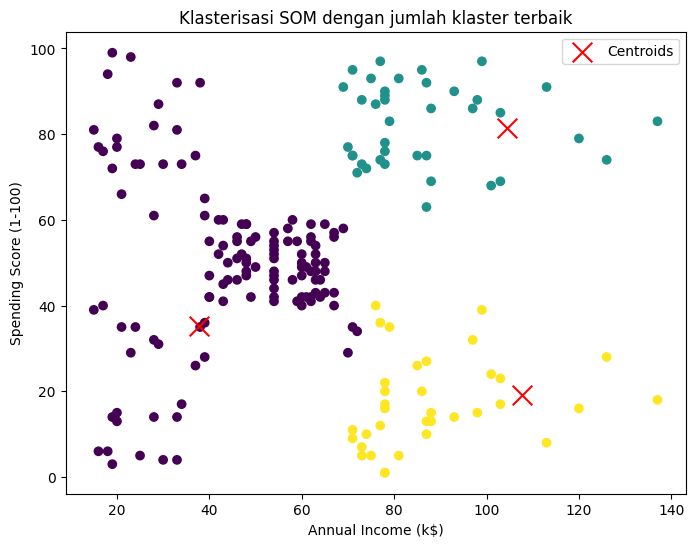

In [ ]:
#hasil perbandingan
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Data yang digunakan untuk klasterisasi adalah fitur Annual Income (k$)	Spending Score (1-100)
X = data[['Annual Income (k$)', 'Spending Score (1-100)'] ].values # diisi praktikan
print('Data:\n', X)

centroids, labels = som(X, lrate=0.2 , b=0.05 , max_epoch=200 , n_cluster=3) #cari parameter untuk mendapatkan hasil klasterisasi yang lebih baik
print('centroid terbaru:\n',centroids)

# Hitung Silhouette score
silhouette = silhouette_score(X, labels)
print('Silhouette score:', silhouette)
draw(X, labels, centroids)

Kita tidak menggunakan akurasi untuk menilai kinerja clustering, melainkan silhouette score. Silhouette score adalah metrik yang digunakan untuk menghitung seberapa baik pengelompokan/clustering. Nilainya berkisar antara -1 hingga 1. dengan detail sebagai berikut.

1: cluster berjauhan satu sama lain dan dapat dibedakan dengan jelas.

0 : Berarti cluster bersifat indifferent, atau dapat dikatakan jarak antar cluster tidak signifikan.

-1: Berarti cluster dikelompokkan dengan cara yang salah.

**Pertanyaan**  
Dikarenakan training untuk mencapai akurasi 1.0 memakan waktu yang lama.

1. Carilah learning rate, b, dan max epoch yang sesuai dan menghasilkan hasil klasterisasi yang cukup baik!

2. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate, b, dan max epoch yang di masukkan!

Silhouette score (lrate=0.1, b=0.1, max_epoch=100): 0.4412193273813714


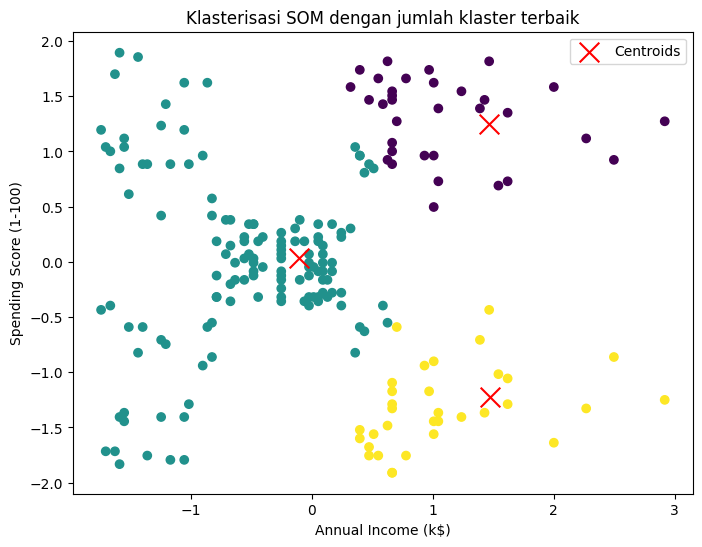

In [ ]:
centroids, labels = som(X_scaled, lrate=0.1, b=0.1, max_epoch=100, n_cluster=3)
silhouette = silhouette_score(X_scaled, labels)
print(f'Silhouette score (lrate=0.1, b=0.1, max_epoch=100):', silhouette)
draw(X_scaled, labels, centroids)

Silhouette score (lrate=0.2, b=0.05, max_epoch=100): 0.4234623962446936


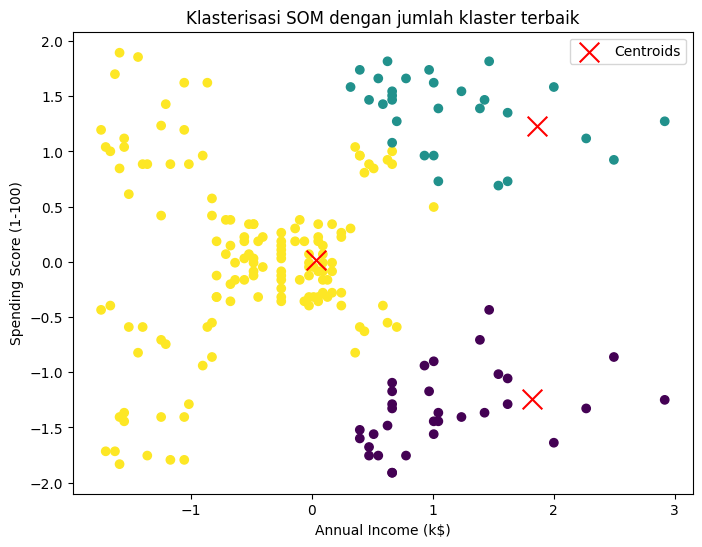

In [ ]:
centroids, labels = som(X_scaled, lrate=0.2, b=0.05, max_epoch=100, n_cluster=3)
silhouette = silhouette_score(X_scaled, labels)
print(f'Silhouette score (lrate=0.2, b=0.05, max_epoch=100):', silhouette)
draw(X_scaled, labels, centroids)

Silhouette score (lrate=0.1, b=0.2, max_epoch=200): 0.4640338391800137


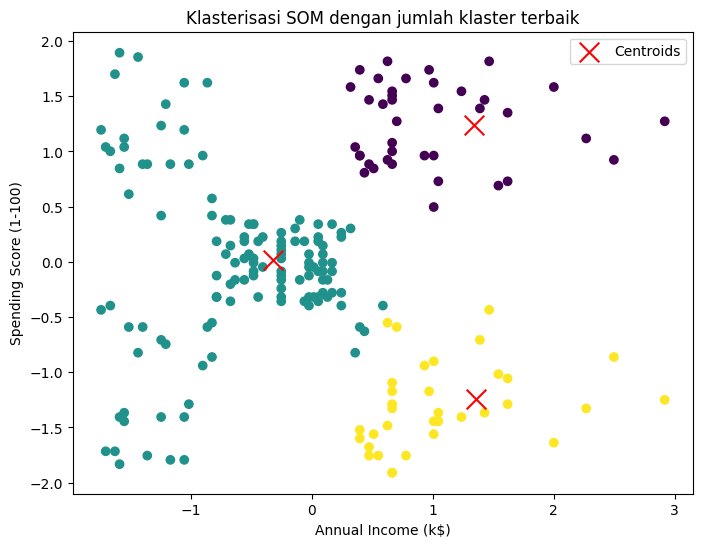

In [ ]:
centroids, labels = som(X_scaled, lrate=0.1, b=0.2, max_epoch=200, n_cluster=3)
silhouette = silhouette_score(X_scaled, labels)
print(f'Silhouette score (lrate=0.1, b=0.2, max_epoch=200):', silhouette)
draw(X_scaled, labels, centroids)

Silhouette score (lrate=0.05, b=0.1, max_epoch=200): 0.46149857785686366


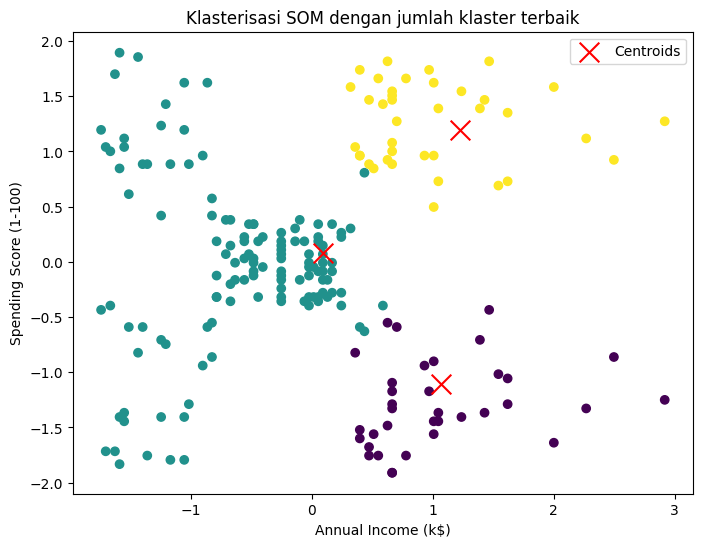

In [ ]:
centroids, labels = som(X_scaled, lrate=0.05, b=0.1, max_epoch=200, n_cluster=3)
silhouette = silhouette_score(X_scaled, labels)
print(f'Silhouette score (lrate=0.05, b=0.1, max_epoch=200):', silhouette)
draw(X_scaled, labels, centroids)


Berdasarkan hasil eksperimen yang dilakukan dengan berbagai kombinasi parameter learning rate (lrate), decay factor (b), dan max_epoch, dapat disimpulkan bahwa pengaturan yang memberikan hasil terbaik adalah lrate=0.1, b=0.2, max_epoch=200, dengan Silhouette score tertinggi sebesar 0.464. Nilai ini menunjukkan clustering yang cukup baik, dengan cluster yang lebih terpisah dan mudah dibedakan. Sebaliknya, eksperimen dengan lrate=0.2, b=0.05, max_epoch=100 menghasilkan Silhouette score lebih rendah (0.423), menunjukkan bahwa learning rate yang lebih tinggi dapat mengganggu stabilitas pembelajaran dan menghasilkan cluster yang kurang optimal. Selain itu, penggunaan max_epoch yang lebih banyak (200) juga terbukti meningkatkan kualitas clustering, dibandingkan dengan max_epoch 100, karena memberikan lebih banyak kesempatan bagi model untuk mencapai konvergensi yang lebih baik. Secara keseluruhan, eksperimen ini menunjukkan bahwa decay factor (b) yang lebih tinggi, bersama dengan learning rate moderat (0.1) dan epoch yang lebih banyak, memberikan hasil yang lebih optimal dalam hal pemisahan cluster dan kinerja model secara keseluruhan.